In [140]:
import os
import PyPDF2
import docx2txt
from docx import Document
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import re

Functions required for text extraction from word and pdf files

In [2]:

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        page_no = len(reader.pages)
        for page_num in range(page_no):
            page = reader.pages[page_num]
            text += page.extract_text()
    return text.strip()

def extract_text_from_docx(docx_path):
    return docx2txt.process(docx_path)


In [3]:
def extract_text_from_folder(folder_path):   
    text_list = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if filename.endswith('.pdf'):
            text = extract_text_from_pdf(file_path)
            text_list.append(text)
        elif filename.endswith('.docx'):
            text = extract_text_from_docx(file_path)
            text_list.append(text)
    return text_list


Functions required for text cleaning, tokanization and lemmatization

In [4]:
def cleanResume(resumeText):
    resumeText = re.sub(r'[^a-zA-Z\d]',r' ', resumeText) 
    resumeText = re.sub(r'\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText.lower()

In [5]:
def clean_text(text):
    text = word_tokenize(text)
    text2 = []
    for word in text:
        if word not in stopwords.words('english'):
            text2.append(WordNetLemmatizer().lemmatize(word))
    return ' '.join(text2)

# Extracting the data from Peoplesoft resumes

In [6]:
folder_path = r"C:\Users\Mayur\OneDrive\Desktop\Project 2\Resumes\Peoplesoft resumes"
text_list = extract_text_from_folder(folder_path)
print(text_list)

['Anubhav Kumar Singh\t\t\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\nCore Competencies:\n\n\n\nScripting\t\t: Shell Scripting\n\n\n\nApplication\t\t: PeopleSoft HCM, FINANCIALS\n\n\n\nOperating System\t: Linux ,Windows\n\n\n\nWeb/App Servers\t: Weblogic, Tuxedo\n\n\n\nRDBMS\t\t: Oracle\n\n\n\nRepository \t\t: Github\n\n\n\n  To work in a globally competitive environment on \n\n  challenging assignments that shall yield the \n\n  twin benefits of the job satisfaction and a steady-paced \n\n  professional growth.\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n \n\n\n\n\n\n Professional Experience\n\n\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\n\t\t\tCurrent Role: System Admin Offshore\n\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\n\n\nMana

In [7]:
df_peoplesoft = pd.DataFrame(text_list, columns=['Resumes'])

In [8]:
df_peoplesoft['Category'] = ['peoplesoft' for _ in range(len(text_list))]

In [9]:
df_peoplesoft

,Resumes,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,peoplesoft
1,Profile Summary: \n• 7+ years of ex...,peoplesoft
2,PeopleSoft Database Administrator \n ...,peoplesoft
3,Classification: Internal\n\nClassification: In...,peoplesoft
4,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",peoplesoft
5,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft
6,PeopleSoft Admin /PeopleSoft DBA \n \nGanesh ...,peoplesoft
7,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft
8,Sensitivity: Internal & Restricted \n Arun V...,peoplesoft
9,Personal Details \n \n \n \n \nExperience S...,peoplesoft


In [10]:
df_peoplesoft['Cleaned Resume'] = df_peoplesoft['Resumes'].apply(lambda X : cleanResume(X))

In [11]:
df_peoplesoft

,Resumes,Category,Cleaned Resume
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,peoplesoft,anubhav kumar singh core competencies scriptin...
1,Profile Summary: \n• 7+ years of ex...,peoplesoft,profile summary 7 years of experience in imple...
2,PeopleSoft Database Administrator \n ...,peoplesoft,peoplesoft database administrator gangareddy p...
3,Classification: Internal\n\nClassification: In...,peoplesoft,classification internal classification interna...
4,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",peoplesoft,sirazuddin m bangalore india sirazuddin m bang...
5,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft,peoplesoft admin varkala vikas career objectiv...
6,PeopleSoft Admin /PeopleSoft DBA \n \nGanesh ...,peoplesoft,peoplesoft admin peoplesoft dba ganesh alladi ...
7,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft,peoplesoft administration vivekanand sayana ca...
8,Sensitivity: Internal & Restricted \n Arun V...,peoplesoft,sensitivity internal restricted arun venu expe...
9,Personal Details \n \n \n \n \nExperience S...,peoplesoft,personal details experience summary 4 1 years ...


# Extracting the data from SQL Developer resumes

In [75]:
folder_path = r"C:\Users\Mayur\OneDrive\Desktop\Project 2\Resumes\SQL Developer Lightning insight"
text_list = extract_text_from_folder(folder_path)
print(text_list)

['ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Developer   \n\n\n\n\t\t\n\n\n\nSummary\n\n\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\n\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\n\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\n\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\n\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\n\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\n\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\n\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\n\nUsed c

In [76]:
df_sql = pd.DataFrame(text_list, columns=['Resumes'])

In [77]:
df_sql['Category'] = ['Sql developer' for _ in range(len(text_list))]

In [78]:
df_sql['Cleaned Resume'] = df_sql['Resumes'].apply(lambda X : cleanResume(X))

In [79]:
df_sql

,Resumes,Category,Cleaned Resume
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,Sql developer,anil kumar maddukuri sql msbi developer summar...
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,Sql developer,aradhana tripathi current location gachibowli ...
2,BUDDHA VAMSI ...,Sql developer,buddha vamsi career objective have 2 11 years ...
3,KAMBALLA PRADEEP ...,Sql developer,kamballa pradeep synopsis looking forward to a...
4,Hyderabad Nazeer Basha \nSQL and Power BI D...,Sql developer,hyderabad nazeer basha sql and power bi develo...
5,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,Sql developer,resume name neeraj mishra experience summary h...
6,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,Sql developer,sql developer name bandi prem sai career objec...
7,SQL SERVER DEVELOPER \n \n \nPriyanka L ...,Sql developer,sql server developer priyanka l professional s...
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,Sql developer,sql server developer p syam kumar professional...
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,Sql developer,raju pavana kumari professional summary having...


# Extracting data from Workday resume

In [80]:
folder_path = r"C:\Users\Mayur\OneDrive\Desktop\Project 2\Resumes\workday resumes"
text_list = extract_text_from_folder(folder_path)
print(text_list)

['Chinna Subbarayudu M\n\nDOB: 06th March 1994\n\nNationality: Indian\n\n\t\t\n\n\t\t\tPROFILE SUMMARY:\n\n\n\n\n\n\n\nHaving around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies.\n\n3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation.\n\nExperience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing.\n\nHands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer.\n\nDeveloped and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool.\n\nInvolved in transformation of XML into XSLT for presenting data for different web Services.\n\nBuilding Workday Integration (EIB), calculated fields, Custom Reports and Writing XSLT transformation code.\n\nDeveloped testing\xa0strategies and vali

In [81]:
df_workday = pd.DataFrame(text_list, columns=['Resumes'])

In [82]:
df_workday['Category'] = ['Workday' for _ in range(len(text_list))]

In [83]:
df_workday['Cleaned Resume'] = df_workday['Resumes'].apply(lambda X : cleanResume(X))

# Extracting data from React developer resume

In [84]:
folder_path = r"C:\Users\Mayur\OneDrive\Desktop\Project 2\Resumes"
text_list = extract_text_from_folder(folder_path)
print(text_list)

['Name: Ravali P \n\n\n\n                                                                             Curriculum Vitae \n\n                                          Specialization: BE (computer science and Engg)   \n\n\n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n       \n\nC\n\nA\n\nR\n\nEE\n\nR\n\n \n\nOB\n\nJE\n\nCT\n\nI\n\nV\n\nE\n\n \n\n \n\nTo utilize my technical skills for achieving the target and developing the best performance in organization. \n\n \n\n \n\n\n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n        \n\nE\n\nD\n\nU\n\nC\n\nA\n\nT\n\nION\n\n \n\n \n\n \n\nDegree/Course \n\n \n\nCollege/Institute \n\nUniversity/ Board \n\nPercentage/ CGPA \n\n \n\nYear of Passing \n\n \n\n \n\n \n\n \n\n \n\n CGPACGPA \n\n \n\n \n\n \n\n \n\n             \n\n            BE \n\n \n\n S J B Institute of technology \n\n \n\n \n\nVTU \n\n \n\n6.5 CGPA \n\n \n\n \n\n2021 \n\n \n\n        \n\n         Diploma \n\nAryabharathi polytechnic \n

In [85]:
df_react_developer = pd.DataFrame(text_list, columns=['Resumes'])

In [86]:
df_react_developer['Category'] = ['React developer' for _ in range(len(text_list))]


In [87]:
df_react_developer['Cleaned Resume'] = df_react_developer['Resumes'].apply(lambda X : cleanResume(X))

In [88]:
df_react_developer

,Resumes,Category,Cleaned Resume
0,Name: Ravali P \n\n\n\n ...,React developer,name ravali p curriculum vitae specialization ...
1,SUSOVAN BAG \n\nSeeking a challenging po...,React developer,susovan bag seeking a challenging position in ...
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React developer,kanumuru deepak reddy career objective to secu...
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React developer,haripriya battina experience as ui developer i...
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React developer,kamalakar reddy a linked in https www linkedin...
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React developer,naveen sadhu title software developer location...
6,PROFILE \nSearching for the opportunity to \...,React developer,profile searching for the opportunity to bring...
7,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React developer,pragnya pattnaik expertise having around 2 yea...
8,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React developer,sarala madasu sarala madasu 204 sri geethika p...
9,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React developer,thirupathamma balla summary 2 8 year of it exp...


# creating common data frame for all resumes

In [89]:
resume_df =pd.concat([df_peoplesoft,df_sql,df_workday,df_react_developer],ignore_index=True)

In [90]:
resume_df['Cleaned Resume'] = resume_df['Cleaned Resume'].apply(clean_text)

In [91]:
resume_df

,Resumes,Category,Cleaned Resume
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,peoplesoft,anubhav kumar singh core competency scripting ...
1,Profile Summary: \n• 7+ years of ex...,peoplesoft,profile summary 7 year experience implementing...
2,PeopleSoft Database Administrator \n ...,peoplesoft,peoplesoft database administrator gangareddy p...
3,Classification: Internal\n\nClassification: In...,peoplesoft,classification internal classification interna...
4,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",peoplesoft,sirazuddin bangalore india sirazuddin bangalor...
...,...,...,...
71,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React developer,md khizaruddin rauf experience currently worki...
72,Page | 1 \n Name: M. Prabakaran \nTitle: UI ...,React developer,page 1 name prabakaran title ui developer prof...
73,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React developer,pranish sonone career summary experience 1 yea...
74,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React developer,ranga gaganam professional summary professiona...


<Axes: xlabel='Category'>

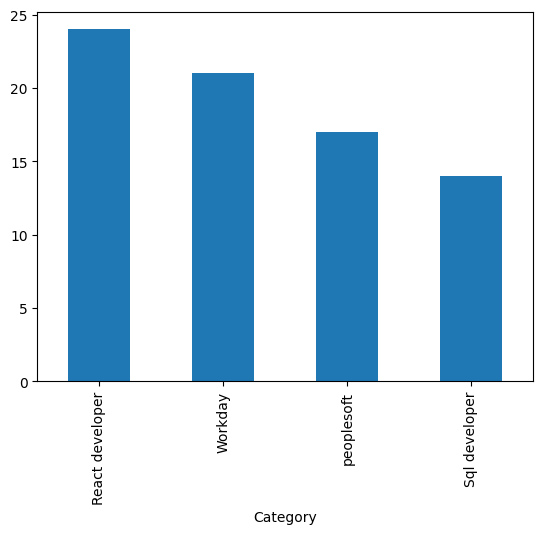

In [92]:
resume_df['Category'].value_counts().plot(kind='bar')

To visualize the words in a word cloud,using WordCloud package with the generate method on the resumes.

In [192]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 5000,
        height = 4000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (10, 10),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


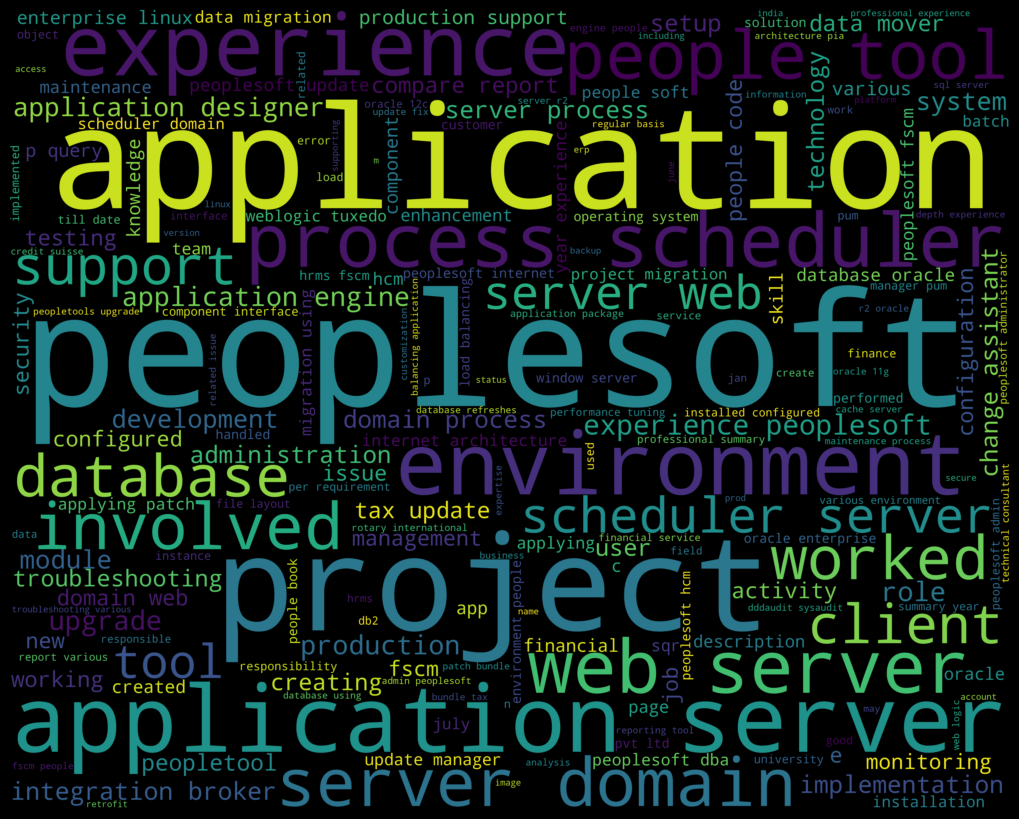

In [193]:
text = ''
for i in resume_df[resume_df['Category']=='peoplesoft']['Cleaned Resume'].values:
    text+= i
generate_word_cloud(text)

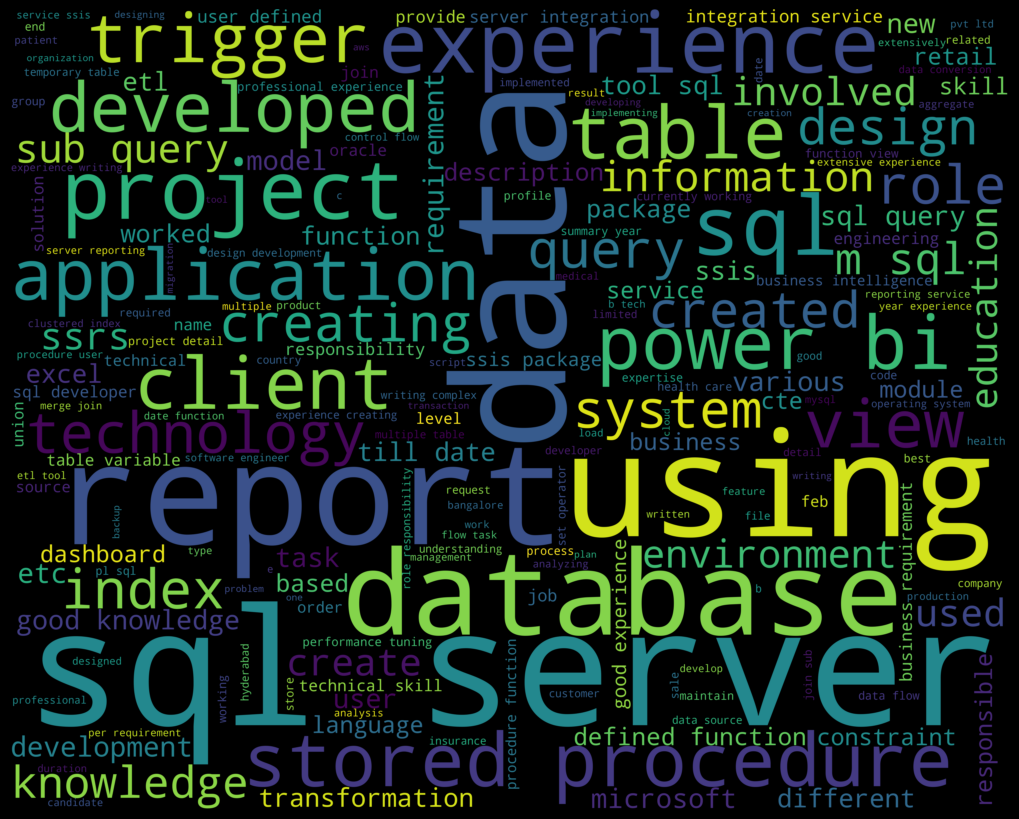

In [194]:
text = ''
for i in resume_df[resume_df['Category']=='Sql developer']['Cleaned Resume'].values:
    text+= i
generate_word_cloud(text)

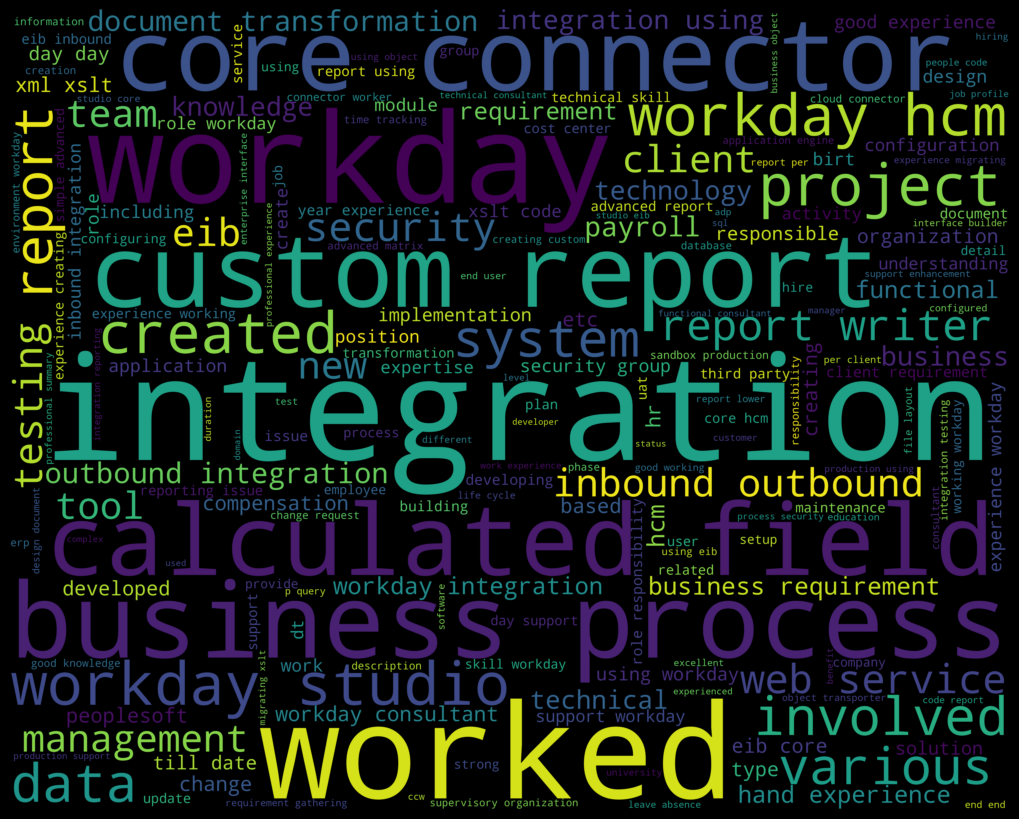

In [195]:
text = ''
for i in resume_df[resume_df['Category']=='Workday']['Cleaned Resume'].values:
    text+= i
generate_word_cloud(text)

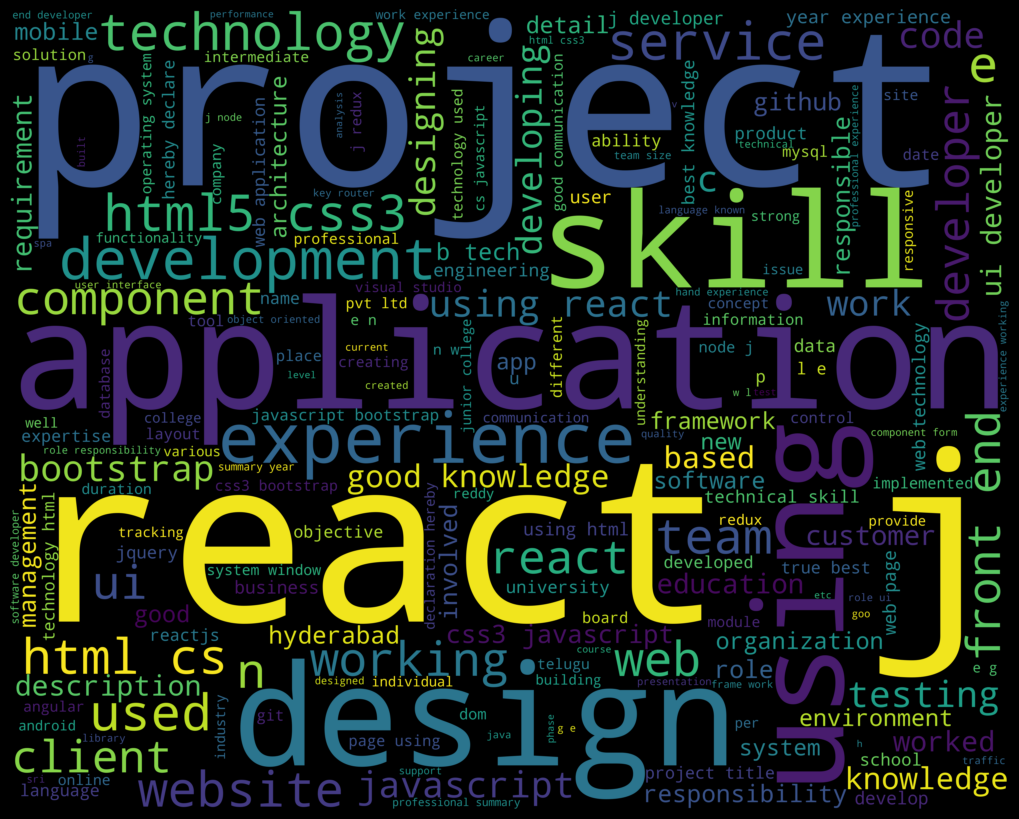

In [196]:
text = ''
for i in resume_df[resume_df['Category']=='React developer']['Cleaned Resume'].values:
    text+= i
generate_word_cloud(text)

In [160]:
# encoding a category column
resume_df['Category'] = resume_df['Category'].map({'peoplesoft' : 0 , 'Sql developer':1, 'Workday':2, 'React developer':3})

In [161]:
# train test split
text = resume_df["Cleaned Resume"].values
labels = resume_df['Category'].values
text_train,text_test,y_train,y_test = train_test_split(text, labels, random_state=0, test_size=0.25, stratify=resume_df['Category'])
print(text_train.shape)
print(y_train.shape)
print(text_test.shape)
print(y_test.shape)

(57,)
(57,)
(19,)
(19,)


In [162]:
# vectorization using TF-IDF
word_vectorizer = TfidfVectorizer(
sublinear_tf=True,
use_idf = True,
stop_words='english',
max_features=1000)

In [163]:
X_train = word_vectorizer.fit_transform(text_train)
X_train.shape

(57, 1000)

In [164]:
X_test = word_vectorizer.transform(text_test)
X_test.shape

(19, 1000)

In [165]:
# training Naivies bayes  model
clf = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction_mnb = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of MultinomialNB Classifier on training set: 1.00
Accuracy of MultinomialNB Classifier on test set: 0.95


In [166]:
# training KNN model
model = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train, y_train)
prediction_knc = model.predict(X_test)
model.fit(X_train,y_train)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set: 1.00


In [167]:
print(metrics.classification_report(y_test, prediction_mnb))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       0.86      1.00      0.92         6

    accuracy                           0.95        19
   macro avg       0.96      0.94      0.95        19
weighted avg       0.95      0.95      0.95        19



In [168]:
print(metrics.classification_report(y_test, prediction_knc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



# from above classification reports we can see that KNN model works better as compared to Naives bayes model

In [50]:
model_data = {
    'knn_model': model,
    'vectorizer': word_vectorizer
}

# Pickle the dictionary
with open('model.pkl', 'wb') as f:
    pickle.dump(model_data, f)